# DEMO

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), 'scripts'))

import cv2
import numpy as np
import matplotlib.pyplot as plt
from embedding import embedding

## Embedding

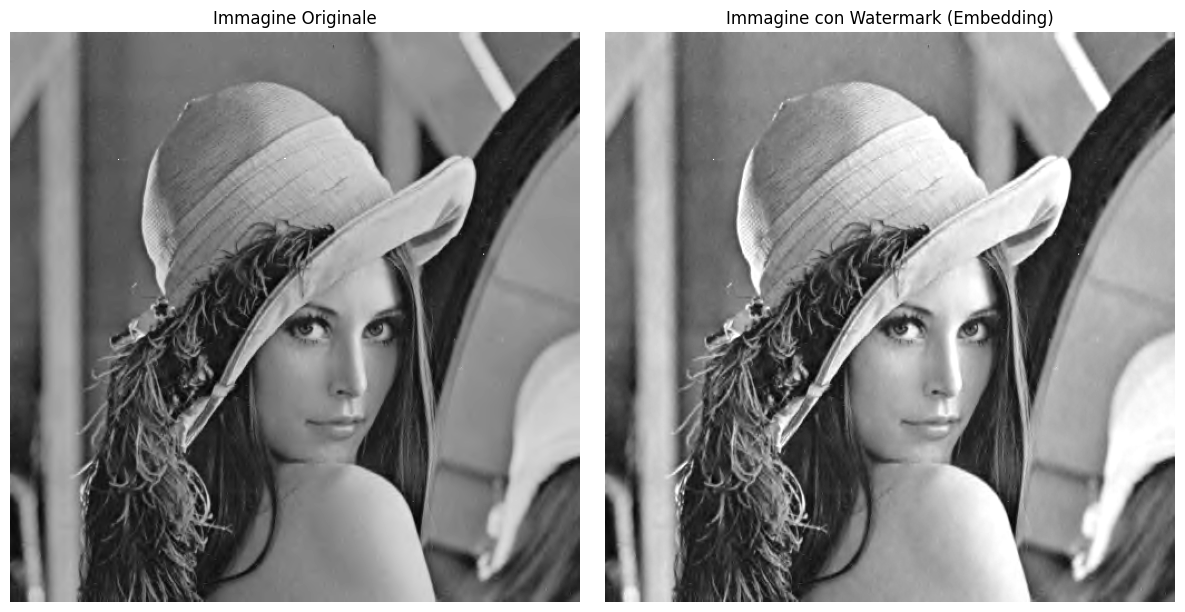

In [2]:

image_path = 'images/lena_grey.bmp'      
watermark_path = 'mark.npy'

#embedded image
watermarked_image = embedding(image_path, watermark_path)

# original image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(18, 6))

# plot
plt.subplot(1, 3, 1)  
plt.imshow(original_image, cmap='gray')
plt.title('Immagine Originale')
plt.axis('off')  

plt.subplot(1, 3, 2) 
plt.imshow(watermarked_image, cmap='gray')
plt.title('Immagine con Watermark (Embedding)')
plt.axis('off')

plt.tight_layout()
plt.show()

## ROC

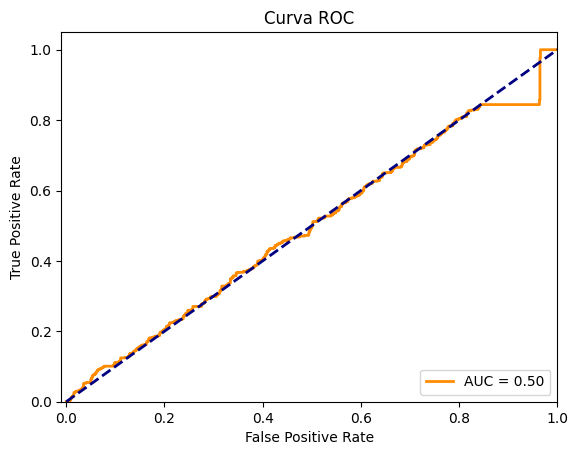

La soglia ottimale calcolata è: 10.499192943893654


In [3]:
# Importa la funzione dal file ROC.py
from ROC import calculate_threshold

# Specifica la cartella delle immagini e il file del watermark
images_folder = './images'
mark_file = 'mark.npy'

# Calcola la soglia ottimale
tau_optimal = calculate_threshold(images_folder, mark_file)

# Stampa la soglia ottimale
print(f"La soglia ottimale calcolata è: {tau_optimal}")
